In [14]:
# Find and locate vehicle by template matching
# Note: this method is not recommended for vehicle detection.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path0 ='test_images/'
path = 'test_images/bbox-example-image.jpg'
path_2 = 'test_images/bbox-example-image-2.jpg'
image = mpimg.imread(path)
#image = mpimg.imread(path_2)

templist =['test_images/cutout1.jpg',
           'test_images/cutout2.jpg',
           'test_images/cutout3.jpg',
           'test_images/cutout4.jpg',
           'test_images/cutout5.jpg',
           'test_images/cutout6.jpg',]

def draw_boxes(img, bboxes, color=(0,255,0), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw bounding boxes
    for bbox in range(len(bboxes)):
        (x1, y1), (x2, y2) = bboxes[bbox]
        cv2.rectangle( draw_img, (x1, y1), (x2, y2), color, thick)
    return draw_img

def find_matches(img, template_list):
    bbox_list = []
    # define matching method
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # read in templates
        tmp = mpimg.imread(temp)
        # use cv2.mathTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # append bbox position to list
        bbox_list.append((top_left, bottom_right))
        
    return bbox_list

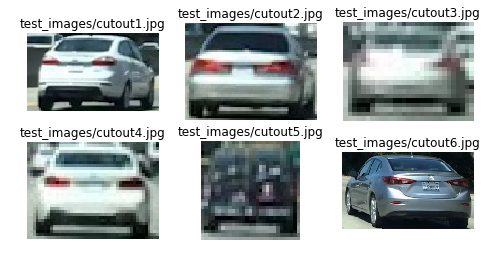

In [25]:
# plot templates
plt.figure(figsize=(8,4))
for i in range(len(templist)):
    plt.subplot(2,3,i+1)
    img = mpimg.imread(templist[i])
    plt.imshow(img)
    plt.title(templist[i], fontsize=12)
    plt.axis('off')
plt.show()
    

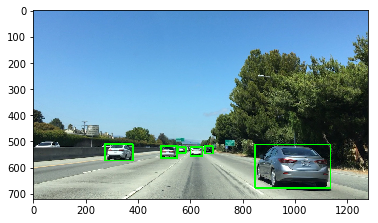

In [26]:
bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()